# Supervised Learning Project

In [83]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import seaborn as sns
%matplotlib inline

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Read the column description and ensure you understand each attribute well

In [84]:
bank_dataframe = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [10]:
bank_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [30]:
bank_dataframe

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [12]:
bank_dataframe.shape

(5000, 14)

In [13]:
bank_dataframe.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# 2. Study the data distribution in each attribute, share your findings (15 marks)

Text(0.5, 1.0, 'Age Distribution')

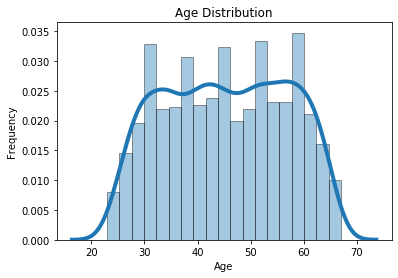

In [7]:
age=sns.distplot(bank_dataframe['Age'],hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
age.set_xlabel("Age")
age.set_ylabel("Frequency")
age.set_title("Age Distribution")

* The above plot shows how the data of the column "Age" of the customers is distributed.
* Based on the visual observation, one can tell that most of the customers in the dataset roughly lie between the age group of 30 to 60 years.

Text(0.5, 1.0, 'Experience Distribution')

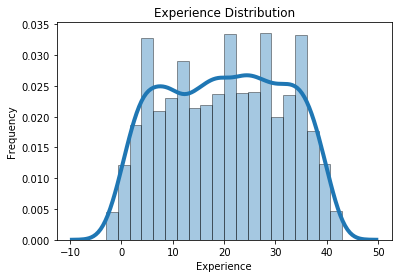

In [9]:
experience=sns.distplot(bank_dataframe['Experience'],hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
experience.set_xlabel("Experience")
experience.set_ylabel("Frequency")
experience.set_title("Experience Distribution")

* The above plot shows how the data of the column "Experience" of the customers is distributed.
* Based on the visual observation, one can tell that most of the customers' experience in the dataset roughly lie between the 5 to 38 years. However, customers which have 10years of experience saw a minor decline.

Text(0.5, 1.0, 'Income Distribution')

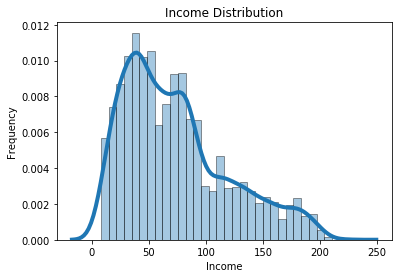

In [10]:
Income=sns.distplot(bank_dataframe['Income'],hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
Income.set_xlabel("Income")
Income.set_ylabel("Frequency")
Income.set_title("Income Distribution")

* The above plot shows how the data distribution of the column "Income" of the customers is skewed to the left.

Text(0.5, 1.0, 'ZIP Code Distribution')

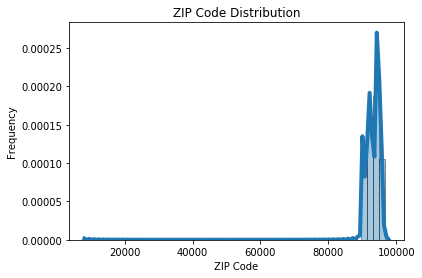

In [12]:
ZIPCode=sns.distplot(bank_dataframe['ZIP Code'],hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
ZIPCode.set_xlabel("ZIP Code")
ZIPCode.set_ylabel("Frequency")
ZIPCode.set_title("ZIP Code Distribution")

* The above plot shows how the data distribution of the column "ZIP Code" of the customers is  highly skewed to the right.

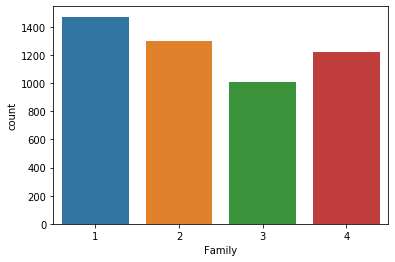

In [23]:
sns.countplot(x='Family',data=bank_dataframe)

* The above plot shows how the data distribution of the column "Family" , which has the count of members in the Family. Most of the family has only 1 member followed by 2 and 4 members.

Text(0.5, 1.0, 'CCAvg Distribution')

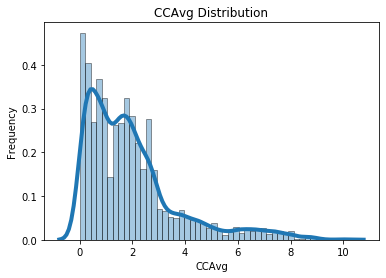

In [25]:
CCAvg=sns.distplot(bank_dataframe['CCAvg'],hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
CCAvg.set_xlabel("CCAvg")
CCAvg.set_ylabel("Frequency")
CCAvg.set_title("CCAvg Distribution")

* The above plot shows how the data distribution of the column "CCAvg" of the customers is  highly skewed to the left.

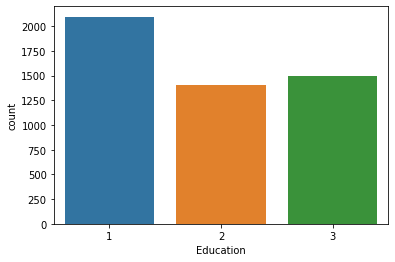

In [26]:
sns.countplot(x='Education',data=bank_dataframe)

* The above plot shows how the data distribution of the column "Education", the density of the plot is more for the category "1": UnderGrad in the Education column of the dataset.

Text(0.5, 1.0, 'Mortgage Distribution')

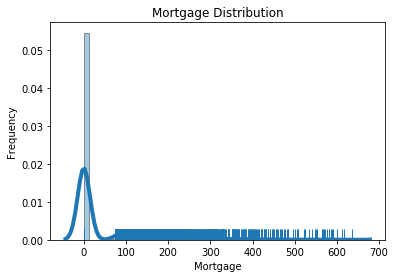

In [31]:
Mortgage=sns.distplot(bank_dataframe['Mortgage'],hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},rug=True)
Mortgage.set_xlabel("Mortgage")
Mortgage.set_ylabel("Frequency")
Mortgage.set_title("Mortgage Distribution")

* The above plot shows the data distribution of the column "Mortgage".
* Most of the observations lie between 100 to 350.

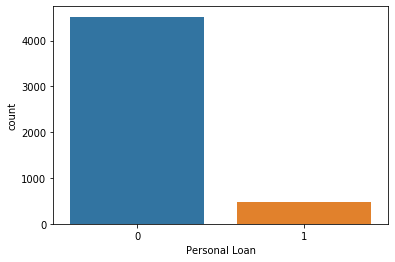

In [33]:
sns.countplot(x='Personal Loan',data=bank_dataframe)

* The above plot shows how many customers with category "1" have accepted the personal loan offered in the last campaign

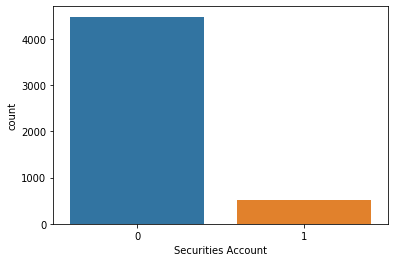

In [35]:
sns.countplot(x='Securities Account',data=bank_dataframe)

* The above plot shows how many customers with category "1" have a securities account with the bank

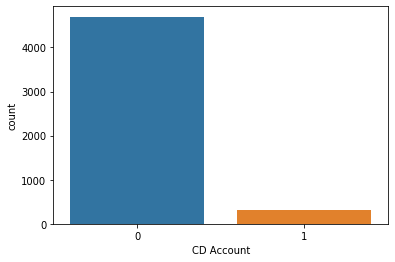

In [36]:
sns.countplot(x='CD Account',data=bank_dataframe)

* The above plot shows how many customers with category "1" have a certificate of deposit (CD) account with the bank

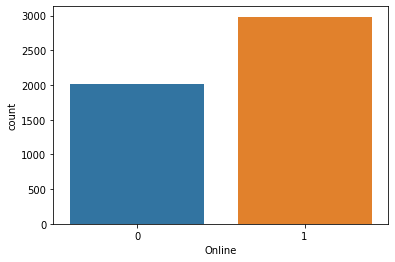

In [37]:
sns.countplot(x='Online',data=bank_dataframe)

* The above plot shows how many customers with category "1" use internet banking facilities

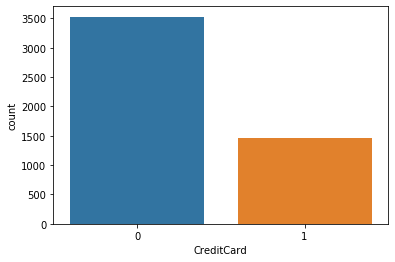

In [38]:
sns.countplot(x='CreditCard',data=bank_dataframe)

* The above plot shows how many customers with category "1" use a credit card issued by UniversalBank

# 3. Get the target column distribution. Your comments (5 marks)

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


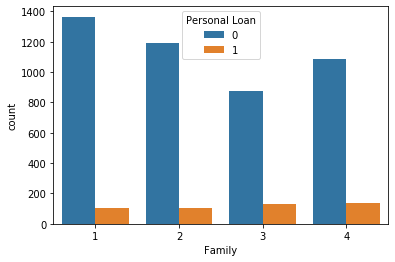

In [140]:
#Family
print(pd.pivot_table(data=bank_dataframe,index='Personal Loan',columns='Family',aggfunc='size'))
sns.countplot(x='Family',data=bank_dataframe,hue='Personal Loan')

* Family with just 1 member has least count of Personal Loan

* Family with 4 members has the highest count of Personal Loan

# 4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [85]:
#Creating family dummy Variables
fa = pd.get_dummies(bank_dataframe['Family'], prefix='Family')
#Adding the results to the master dataframe
bank_df1 = pd.concat([bank_dataframe,fa], axis=1)

In [86]:
#Creating education dummy Variables
ed = pd.get_dummies(bank_dataframe['Education'], prefix='Education')
#Adding the results to the master dataframe
bank_df1 = pd.concat([bank_df1,ed], axis=1)

In [87]:
# We have created dummies for the below variables, so we can drop them
#bank_df2 is our new dataset after cleaning and transformation
bank_df2=bank_df1.drop(['Education','Family'],1)

In [88]:
var=['Securities Account','CD Account','Online','CreditCard']
bank_df2[var]=bank_df2[var].astype('int64')
bank_df2_X = bank_df2.drop(['Personal Loan'], axis=1)
X = bank_df2.drop(['Personal Loan'], axis=1)
y = bank_df2['Personal Loan']

In [49]:
X.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_1                uint8
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_1             uint8
Education_2             uint8
Education_3             uint8
dtype: object

In [89]:
# Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_df2_X, y, train_size=0.7, test_size=0.3, random_state=100)

In [90]:
#Feature Scaling library
from sklearn.preprocessing import StandardScaler

In [91]:
#Applying Scaling to training set
scaler = StandardScaler()
X_train[['Age','Experience','Income','CCAvg']] = scaler.fit_transform(X_train[['Age','Experience','Income','CCAvg']])
X_test[['Age','Experience','Income','CCAvg']] = scaler.transform(X_test[['Age','Experience','Income','CCAvg']])

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)

In [57]:
#ITERATION 1 - Fitting all the features in the first iteration
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.106221
         Iterations 10
                                   Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.654      
Dependent Variable:       Personal Loan          AIC:                    777.5441   
Date:                     2020-01-26 04:01       BIC:                    882.2729   
No. Observations:         3500                   Log-Likelihood:         -371.77    
Df Model:                 16                     LL-Null:                -1075.0    
Df Residuals:             3483                   LLR p-value:            6.7082e-290
Converged:                1.0000                 Scale:                  1.0000     
No. Iterations:           10.0000                                                   
------------------------------------------------------------------------------------
                    Coef.     Std.Err.      z    P>|z|      [0.025         0.975] 

In [58]:
#dropping Family_2 and Education_1 in iteration 2 as they have high p value
X_train1 = X_train.drop(['Family_2','Education_1'], axis=1)

In [59]:
#ITERATION 2
logit_model=sm.Logit(y_train,X_train1)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.107940
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.649      
Dependent Variable:  Personal Loan    AIC:              787.5810   
Date:                2020-01-26 04:02 BIC:              886.1493   
No. Observations:    3500             Log-Likelihood:   -377.79    
Df Model:            15               LL-Null:          -1075.0    
Df Residuals:        3484             LLR p-value:      2.6460e-288
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ID                 -0.0000   0.0001  -0.4895 0.6245 -0.0002  0.0001
Age                -0.3184   0.9230  -0.

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,90.94
2,Experience,90.82
4,ZIP Code,10.92
0,ID,4.04
9,Online,2.61
11,Family_1,2.12
13,Family_4,2.05
15,Education_3,1.91
3,Income,1.88
12,Family_3,1.88


In [62]:
#dropping Age as it high VIF value and its very strongly correlated to experience in correlation matrix
X_train1 = X_train.drop(['Family_2','Education_1','Age'],axis=1)

In [63]:
#ITERATION 3
logit_model=sm.Logit(y_train,X_train1)
result3=logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.107957
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.649      
Dependent Variable:  Personal Loan    AIC:              785.7011   
Date:                2020-01-26 04:08 BIC:              878.1089   
No. Observations:    3500             Log-Likelihood:   -377.85    
Df Model:            14               LL-Null:          -1075.0    
Df Residuals:        3485             LLR p-value:      2.7623e-289
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ID                 -0.0000   0.0001  -0.4904 0.6238 -0.0002  0.0001
Experience          0.1863   0.0968   1.

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,ZIP Code,10.82
0,ID,4.04
8,Online,2.61
10,Family_1,2.12
12,Family_4,2.05
2,Income,1.87
11,Family_3,1.87
14,Education_3,1.78
13,Education_2,1.77
4,CCAvg,1.75


In [65]:
#dropping Mortgage as it high p value
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage'],axis=1)

In [66]:
#ITERATION 4
logit_model=sm.Logit(y_train,X_train1)
result4=logit_model.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.108217
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.648      
Dependent Variable:  Personal Loan    AIC:              785.5201   
Date:                2020-01-26 04:08 BIC:              871.7673   
No. Observations:    3500             Log-Likelihood:   -378.76    
Df Model:            13               LL-Null:          -1075.0    
Df Residuals:        3486             LLR p-value:      6.4457e-290
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ID                 -0.0000   0.0001  -0.5217 0.6019 -0.0002  0.0001
Experience          0.1820   0.0966   1.8

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,ZIP Code,10.41
0,ID,4.03
7,Online,2.61
9,Family_1,2.12
11,Family_4,2.05
10,Family_3,1.87
2,Income,1.83
13,Education_3,1.78
12,Education_2,1.77
4,CCAvg,1.75


In [94]:
#dropping ZIP code as it has high VIF
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code'],axis=1)
#                         'CCAvg',], axis=1)

#ITERATION 5
logit_model=sm.Logit(y_train,X_train1)
result5=logit_model.fit()
print(result5.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.199012
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.352      
Dependent Variable:  Personal Loan    AIC:              1419.0821  
Date:                2020-01-26 12:34 BIC:              1499.1688  
No. Observations:    3500             Log-Likelihood:   -696.54    
Df Model:            12               LL-Null:          -1075.0    
Df Residuals:        3487             LLR p-value:      2.8646e-154
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ID                 -0.0007   0.0000 -14.5819 0.0000 -0.0008 -0.0006
Experience          0.1461   0.0696   2.0

,Features,VIF
0,ID,2.86
6,Online,2.22
2,Income,1.82
3,CCAvg,1.74
10,Family_4,1.70
8,Family_1,1.69
11,Education_2,1.64
12,Education_3,1.60
9,Family_3,1.58
7,CreditCard,1.48


In [95]:
#dropping CCAvg as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg'],axis=1)

#ITERATION 6
logit_model=sm.Logit(y_train,X_train1)
result6=logit_model.fit()
print(result6.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.199046
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.352      
Dependent Variable:  Personal Loan    AIC:              1417.3195  
Date:                2020-01-26 12:34 BIC:              1491.2458  
No. Observations:    3500             Log-Likelihood:   -696.66    
Df Model:            11               LL-Null:          -1075.0    
Df Residuals:        3488             LLR p-value:      3.7911e-155
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ID                 -0.0007   0.0000 -14.5795 0.0000 -0.0008 -0.0006
Experience          0.1444   0.0695   2.0

,Features,VIF
0,ID,2.86
5,Online,2.22
9,Family_4,1.70
7,Family_1,1.69
10,Education_2,1.64
11,Education_3,1.60
8,Family_3,1.58
6,CreditCard,1.48
4,CD Account,1.37
3,Securities Account,1.25


In [96]:
#dropping Education_2  as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        ],
                        axis=1)

#ITERATION 7
logit_model=sm.Logit(y_train,X_train1)
result7=logit_model.fit()
print(result7.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.202976
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.339      
Dependent Variable:  Personal Loan    AIC:              1442.8344  
Date:                2020-01-26 12:35 BIC:              1510.6001  
No. Observations:    3500             Log-Likelihood:   -710.42    
Df Model:            10               LL-Null:          -1075.0    
Df Residuals:        3489             LLR p-value:      3.4554e-150
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ID                 -0.0006   0.0000 -14.0331 0.0000 -0.0007 -0.0005
Experience          0.1390   0.0690   2.0

,Features,VIF
0,ID,2.78
5,Online,2.19
7,Family_1,1.64
9,Family_4,1.60
6,CreditCard,1.48
8,Family_3,1.48
10,Education_3,1.38
4,CD Account,1.37
3,Securities Account,1.24
2,Income,1.08


In [97]:
#dropping Education_3  as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3'],axis=1)

#ITERATION 8
logit_model=sm.Logit(y_train,X_train1)
result8=logit_model.fit()
print(result8.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.206747
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.327      
Dependent Variable:  Personal Loan    AIC:              1467.2314  
Date:                2020-01-26 12:35 BIC:              1528.8366  
No. Observations:    3500             Log-Likelihood:   -723.62    
Df Model:            9                LL-Null:          -1075.0    
Df Residuals:        3490             LLR p-value:      1.7689e-145
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ID                 -0.0006   0.0000 -13.4739 0.0000 -0.0007 -0.0005
Experience          0.1347   0.0684   1.9

,Features,VIF
0,ID,2.71
5,Online,2.18
7,Family_1,1.61
9,Family_4,1.58
6,CreditCard,1.48
8,Family_3,1.47
4,CD Account,1.37
3,Securities Account,1.24
2,Income,1.07
1,Experience,1.01


In [98]:
#dropping Experience as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)

#ITERATION 9
logit_model=sm.Logit(y_train,X_train1)
result9=logit_model.fit()
print(result9.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.207304
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.325      
Dependent Variable:  Personal Loan    AIC:              1469.1253  
Date:                2020-01-26 12:36 BIC:              1524.5699  
No. Observations:    3500             Log-Likelihood:   -725.56    
Df Model:            8                LL-Null:          -1075.0    
Df Residuals:        3491             LLR p-value:      1.2590e-145
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
ID                 -0.0006   0.0000 -13.4566 0.0000 -0.0007 -0.0005
Income              1.4846   0.0749  19.8

,Features,VIF
0,ID,2.71
4,Online,2.18
6,Family_1,1.61
8,Family_4,1.57
5,CreditCard,1.48
7,Family_3,1.47
3,CD Account,1.37
2,Securities Account,1.24
1,Income,1.07


* Now all the features are significant and VIF is also fine. Selecting these variables to predict the result

# Logistic Regression Model Fitting

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
#Fitting the model on test data
X_test1 = X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)
X_test1.columns

Index(['ID', 'Income', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Family_1', 'Family_3', 'Family_4'],
      dtype='object')

In [102]:
y_pred = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


# KNN for classification

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
#Using X_train dataframe as it was final data after cleaning, apply scaling and splitting

In [113]:
# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [114]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels_KNN = NNH.predict(X_test)

In [131]:
NNH.score(X_test, y_test)

0.8873333333333333

# Applying Gaussian Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
#Iteration 1 - Fitting all variables, cleaned and normalized data
GNB1 = GaussianNB()
GNB1.fit(X_train, y_train)
predicted_labels_GNB = GNB1.predict(X_test)

GNB1.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

[[1253   89]
 [  57  101]]


In [138]:
#CALCULATING METRICES FOR CHECKING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=101
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1253
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=89
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=57

# 6. Print the confusion matrix for all the above models (5 marks)

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1316   26]
 [  83   75]]


In [107]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=75
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1316
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=26
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=83

In [125]:
# Confusion Matrix for Logistic Regression Model:

Confusion Matrix for Logistic Regression Model:


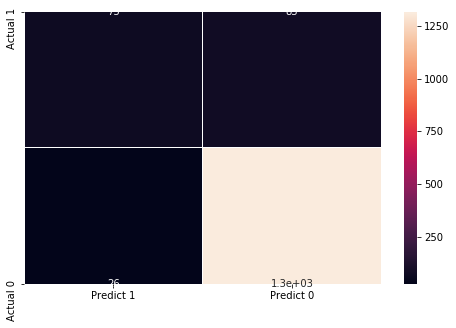

In [130]:
print("Confusion Matrix for Logistic Regression Model:")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm=pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]], columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm, annot=True, linewidths=0.2)

In [124]:
# Confusion Matrix for KNN Model:

In [132]:
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1331   11]
 [ 158    0]]


In [133]:
#CALCULATING METRICES FOR CHECKING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=0
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1331
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=11
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=158

Confusion Matrix for KNN Model:


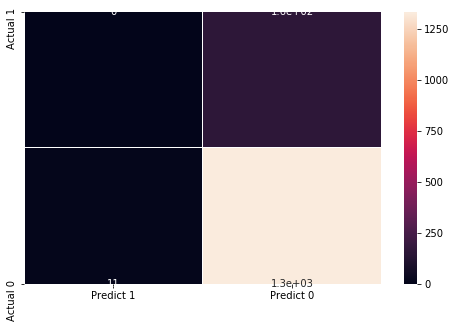

In [134]:
print("Confusion Matrix for KNN Model:")
cm=metrics.confusion_matrix(y_test, predicted_labels_KNN, labels=[1,0])

df_cm=pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]], columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm, annot=True, linewidths=0.2)

In [143]:
# Confusion Matrix for Gaussian Naive Bayes Model:

Confusion Matrix for Gaussian Naive Bayes Model:


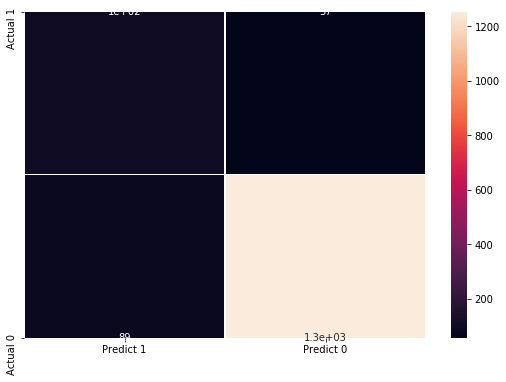

In [148]:
print("Confusion Matrix for Gaussian Naive Bayes Model:")
cm=metrics.confusion_matrix(y_test, predicted_labels_GNB, labels=[1,0])

df_cm=pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]], columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True, linewidths=0.2)

# 7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

In [149]:
#Chossing the best of all 3 models and below are there results:

#Model	  Results									                                      Matrix
#Logistic Accuracy of logistic regression classifier on test set:            92.93%		 [[1316   26]
#	      Misclassification Rate:It is often wrong:                           7.07%		  [  83   75]]
#	      Sensitivity: When its actually yes how often it predicts yes:      48.73%
#	      Specificity: When its actually no, how often does it predict no:   98.14%
#	      Precision: When it predicts yes, how often is it correct:          75.49%
#	

#KNN	  Accuracy of logistic regression classifier on test set:            94.80%		 [[1331   11]
#	      Misclassification Rate: It is often wrong:                          5.20%		  [  158   0]]
#	      Sensitivity: When its actually yes how often it predicts yes:      58.23%
#	      Specificity: When its actually no, how often does it predict no:   99.11%
#	      Precision: When it predicts yes, how often is it correct:          88.46%
#	
#GNB	  Accuracy of logistic regression classifier on test set:            90.33%		 [[1253   89]
#	      Misclassification Rate: It is often wrong:                          9.67%		  [  57  101]]
#	      Sensitivity: When its actually yes how often it predicts yes:      64.56%
#	      Specificity: When its actually no, how often does it predict no:   93.37%
#	      Precision: When it predicts yes, how often is it correct:          53.40%
#

In [150]:
#KNN model performs the best, evident from above results. However, Sensitivity is greater in GNB.
#The yes prediction is on lower side as data is not balanced. Data was not altered as figure represented the 
#true picture of market i.e. person who took loan are on lower side.
#If we apply the model and change our approach and target only those predicted as yes first, it is 88% (Precision)
#chance they will take loan. Hence our chances that a person takes personal loan increases.
#Though our Sensitivity is around 58% still we end up offering more loans at end of program

In [151]:
#To conclude, I have applied what I have learned till now. Further to this we can apply technique like random forest,
#decesion trees etc and use regularization and then compare the results to see if model improves further.